In [1]:
from pandas import read_csv, DataFrame
from scipy.io import arff

#data, meta = arff.loadarff("C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\fw_dataset\\final-dataset-short.arff")
#arff_file = arff.loadarff("C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\fw_dataset\\final-dataset-short.arff")

#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\ms_incident_predict_dataset\\GUIDE_Train.csv"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\cybersec_dataset\\cybersecurity_attacks.csv"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\failure_scania_trucks\\aps_failure_training_set.csv"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\SQL\\SqlInjection.csv"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\internet_fw_logs\\log2.csv"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
file_tag = "cyber_attacks"
#file_tag ="telco_churn"
#data: DataFrame(arff_file[0])
data: DataFrame = read_csv(filename, na_values=" ")
#print(data)
data.shape

(7043, 21)

(7043, 21)


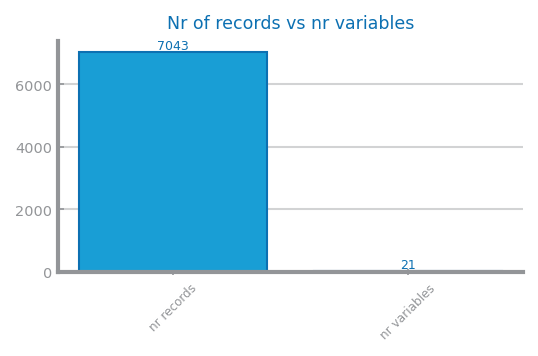

In [2]:
# Figure 1 - Data Dimensionality records vs variables
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

print(data.shape)
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
#file_tag = "cyber_attacks"
savefig(f"images/1_{file_tag}_records_variables.png")
show()

{'numeric': ['tenure', 'MonthlyCharges', 'TotalCharges'], 'binary': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'], 'date': [], 'symbolic': ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']}


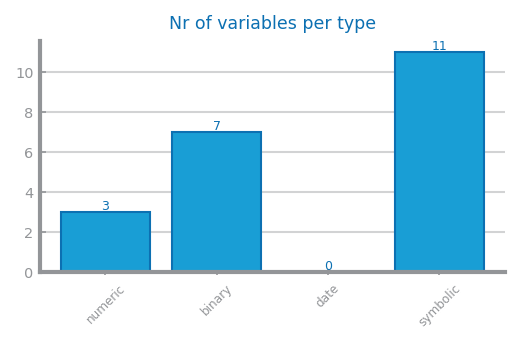

customerID          category
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [3]:
# Figure 2 - Data Dimensionality - Variables/type
from dslabs_functions import get_variable_types

variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/2_{file_tag}_variable_types.png")
show()

symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

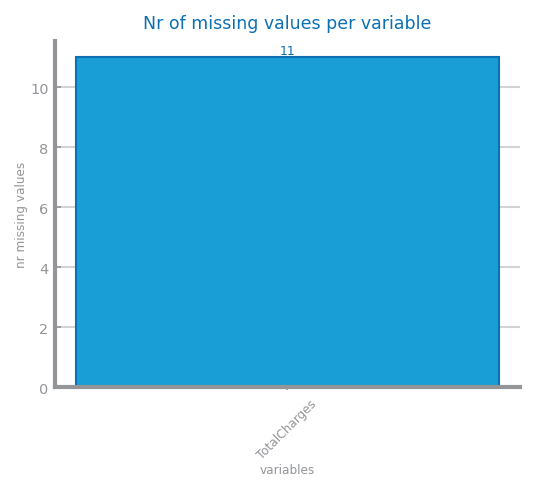

In [4]:
# Figure 3 - Data Dimensionality - #Missing/Variables
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/3_{file_tag}_mv.png")
show()

In [5]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
# Select the second row
specific_row = data.iloc[488]
print(specific_row)

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object
